# Principle Component Analysis (PCA)

- PCA의 목표는 다차원 데이터의 차원을 줄이는 것. 이를 위해 선형 대수를 활용
- 간단히 말해서 분포의 분산이 가장 큰 축을 찾아 수직 축을 제거하는 방법
- 이렇게 하면 정보가 가장 높은 축만 남게 되어 차원을 줄였을 때 어느 정도 의미가 유지된다고 가정

## Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')

## Configuration

In [2]:
# matplotlib configure
plt.rcParams['image.cmap'] = 'gray'

# Color from R ggplot colormap
color = [
    '#6388b4', '#ffae34', '#ef6f6a', '#8cc2ca', '#55ad89', '#c3bc3f',
    '#bb7693', '#baa094', '#a9b5ae', '#767676'
]

## Load dataset

In [3]:
mnist = pd.read_csv('../data/mnist_train.csv')
mnist.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [4]:
label = mnist['label']
mnist.drop(['label'], inplace=True, axis=1)

## Check dataset

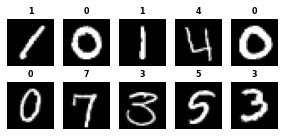

In [5]:
def arr2img(arr, img_size=(28, 28)):
    return arr.reshape(img_size)


fig, axes = plt.subplots(2, 5, figsize=(10, 2))

for idx, ax in enumerate(axes.flat):
    ax.imshow(arr2img(mnist[idx:idx + 1].values))
    ax.set_title(label[idx], fontweight='bold', fontsize=8)
    ax.axis('off')

plt.subplots_adjust(bottom=0.1, right=0.5, top=0.9)
plt.show()

## PCA result

In [6]:
%%time
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(mnist)
mnist_pca = pca.transform(mnist)

CPU times: user 3.16 s, sys: 3.22 s, total: 6.38 s
Wall time: 1.37 s


In [7]:
import plotly.graph_objects as go

fig = go.Figure()

for idx in range(10):
    fig.add_trace(
        go.Scatter(x=mnist_pca[:, 0][label == idx],
                   y=mnist_pca[:, 1][label == idx],
                   name=str(idx),
                   opacity=0.6,
                   mode='markers',
                   marker=dict(color=color[idx])))

fig.update_layout(width=800,
                  height=800,
                  title="PCA result",
                  yaxis=dict(scaleanchor="x", scaleratio=1),
                  legend=dict(orientation="h",
                              yanchor="bottom",
                              y=1.02,
                              xanchor="right",
                              x=1))

fig.show()